# Regularization

* Constraining a model to have fewer degrees of freedom in order to prevent overfitting

## Ridge Regression
* Regularized version of Linear Regression
* More information on page 46 and 49 of notebook

In [18]:
import numpy as np
m =20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

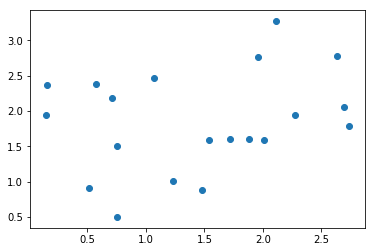

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [72]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0, solver="cholesky")
ridge_reg.fit(X_poly,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.170007e-19
  overwrite_a=True).T


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [73]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new) ## contains X_new[i] and X_new[i]**2
y_new = ridge_reg.predict(X_new_poly)

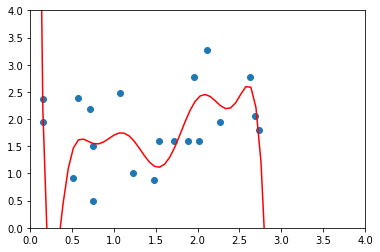

In [74]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

In [87]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [88]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new) ## contains X_new[i] and X_new[i]**2
y_new = ridge_reg.predict(X_new_poly)

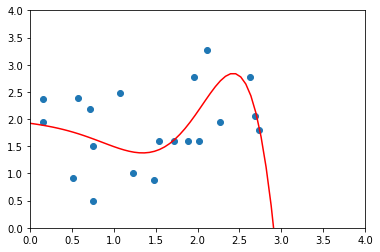

In [89]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

* We can see that when we have an overfitted model (Polynomial Regression degree 10) and apply no Ridge Penalty (alpha = 0), the model is very sensitive to the training data
* Once we apply a Ridge Penalty (alpha = 1), the model actually generalizes properly, which will most likely perform better on testing